In [16]:
from google.colab import files
uploaded = files.upload()


Saving censo.xlsx to censo (1).xlsx


In [17]:
import pandas as pd

# Cargar el archivo subido
censo_df = pd.read_excel('censo.xlsx')

# Ver las primeras filas
censo_df.head()


,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [19]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
censo_df = pd.read_excel('censo.xlsx')
censo_df.head()


Saving censo.xlsx to censo (2).xlsx


,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,...,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion
0,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,3,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.35,A02
1,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
2,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
3,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02
4,68,SANTANDER,68418,LOS SANTOS,2023-05-03 17:09:24.893,1687,128326,6.841800e+19,0,50118082017,...,6.841868e+26,5,0,0,0,10781693454,0,2023-11-27 10:33:13.363,4.95,C02


In [20]:
# Dimensiones iniciales del censo
print("Dimensiones:", censo_df.shape)

# Ver columnas
censo_df.columns


Dimensiones: (12987, 255)


Index(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'fec_paquete',
       'num_paquete', 'num_ficha', 'ide_ficha_origen', 'ide_edificacion',
       'ver_estructura',
       ...
       'ide_Ug', 'persug', 'Capital', 'marca', 'estado', 'Linea_p',
       'replicacion', 'fec_actualizacion_cns', 'C', 'Clasificacion'],
      dtype='object', length=255)

In [23]:
# Eliminar columnas que no aportan al análisis (ajustar según tu criterio)
censo_df.drop(['num_paquete', 'ide_ficha_origen'], axis=1, inplace=True)


In [24]:
# Eliminar filas completamente vacías
censo_df.dropna(how='all', inplace=True)


In [25]:
# Eliminar columnas con más del 50% de nulos
censo_df = censo_df.loc[:, censo_df.isnull().mean() < 0.5]

duplicados

In [27]:
print("Duplicados:", censo_df.duplicated().sum())
censo_df.drop_duplicates(inplace=True)

Duplicados: 0


In [28]:
# Mostrar columnas con más nulos
censo_df.isnull().sum().sort_values(ascending=False).head(10)

,0
fec_ini_visita2,6311
fec_ini_persona1,6221
fec_fin_persona1,6220
seg_nom_informante,6176
seg_nombre,4849
fec_fin_visita2,1181
fec_fin_visita1,693
fec_ini_visita1,693
fec_actualizacion_cns,599
seg_ape_informante,394


In [32]:
# Rellenar con mediana para columnas numéricas
censo_df['persug'].fillna(censo_df['persug'].median(), inplace=True)
censo_df = censo_df[censo_df['Clasificacion'].notnull()]

<ipython-input-32-551910f10d2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  censo_df['persug'].fillna(censo_df['persug'].median(), inplace=True)


In [33]:
# Estadísticas generales
censo_df.describe()


,cod_dpto,cod_mpio,num_ficha,ide_edificacion,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,...,I15,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,C
count,12987.0,12987.0,12987.000000,12987.000000,12987.0,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,...,12987.000000,12987.000000,1.298700e+04,12987.000000,12987.0,12987.000000,12987.000000,1.298700e+04,12987.000000,12987.000000
mean,68.0,68418.0,79376.436282,1.060137,1.0,2.714484,0.086856,14.908909,26946.785093,932824.669978,...,0.343574,4.721491,6.841868e+26,3.595519,0.0,0.836991,3.816124,1.157531e+10,0.013860,3.419774
min,68.0,68418.0,1003.000000,0.000000,1.0,1.000000,0.000000,1.000000,1001.000000,210594.000000,...,0.000000,1.000000,6.841868e+26,1.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,0.000000
25%,68.0,68418.0,36390.000000,0.000000,1.0,3.000000,0.000000,1.000000,10001.000000,990013.000000,...,0.000000,2.000000,6.841868e+26,3.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,2.100000
50%,68.0,68418.0,66476.000000,1.000000,1.0,3.000000,0.000000,1.000000,20007.000000,990076.000000,...,0.000000,4.000000,6.841868e+26,4.000000,0.0,0.000000,0.000000,1.078169e+10,0.000000,3.450000
75%,68.0,68418.0,128264.000000,1.000000,1.0,3.000000,0.000000,2.000000,20012.000000,990432.000000,...,1.000000,5.000000,6.841868e+26,4.000000,0.0,0.000000,0.000000,1.322289e+10,0.000000,4.800000
max,68.0,68418.0,144356.000000,25.000000,1.0,3.000000,6.000000,101.000000,101001.000000,991601.000000,...,1.000000,21.000000,6.841868e+26,10.000000,0.0,20.000000,92.000000,1.322289e+10,1.000000,10.800000
std,0.0,0.0,45918.451270,2.673288,0.0,0.689256,0.716681,34.090908,29728.848879,168291.847345,...,0.474919,3.872781,4.417917e+14,1.440708,0.0,3.687737,16.399527,1.143526e+09,0.116914,1.779675


In [34]:
# Distribución por clasificación
censo_df['Clasificacion'].value_counts()


,count
Clasificacion,
A04,1042
B01,979
B02,920
A05,918
A03,880
B03,779
B04,763
A02,703
B05,591


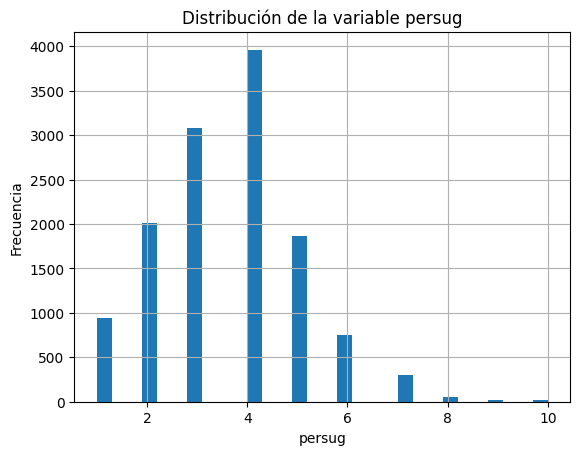

In [35]:
# Histograma de 'persug'
import matplotlib.pyplot as plt

censo_df['persug'].hist(bins=30)
plt.title('Distribución de la variable persug')
plt.xlabel('persug')
plt.ylabel('Frecuencia')
plt.show()


Ver dimensiones y tipos de datos

In [36]:
# Número de filas y columnas
print("Dimensiones del censo:", censo_df.shape)

# Tipos de datos por columna
censo_df.info()


Dimensiones del censo: (12987, 249)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Columns: 249 entries, cod_dpto to Clasificacion
dtypes: datetime64[ns](1), float64(3), int64(209), object(36)
memory usage: 24.7+ MB


Eliminar filas completamente vacías

In [37]:
# Filas completamente vacías
print("Filas vacías:", censo_df.isnull().all(axis=1).sum())

# Eliminar esas filas
censo_df.dropna(how='all', inplace=True)


Filas vacías: 0


In [38]:
# Columnas eliminadas por tener más del 50% de nulos
columnas_a_eliminar = censo_df.columns[censo_df.isnull().mean() > 0.5]
print("Columnas eliminadas:", list(columnas_a_eliminar))

# Eliminarlas
censo_df.drop(columns=columnas_a_eliminar, inplace=True)


Columnas eliminadas: []


Buscar valores negativos en campos numéricos clave

In [39]:
# Buscar valores negativos en columnas numéricas
columnas_numericas = censo_df.select_dtypes(include='number').columns

for col in columnas_numericas:
    negativos = (censo_df[col] < 0).sum()
    if negativos > 0:
        print(f"'{col}' tiene {negativos} valores negativos.")


'Coord_y_manual_rec' tiene 12987 valores negativos.
'Coord_y_auto_rec' tiene 12987 valores negativos.
'Gps_Alt_auto_rec' tiene 5 valores negativos.
'Coord_y_manual_enc' tiene 12987 valores negativos.
'Coord_y_auto_enc' tiene 12987 valores negativos.
'Gps_Alt_auto_enc' tiene 5 valores negativos.


Ver valores únicos en columnas categóricas (para buscar errores o incoherencias)

In [40]:
# Ver columnas de tipo objeto (categóricas)
columnas_categoricas = censo_df.select_dtypes(include='object').columns

for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(censo_df[col].value_counts(dropna=False).head(10))


Columna: Departamento
Departamento
SANTANDER    12987
Name: count, dtype: int64

Columna: Municipio
Municipio
LOS SANTOS    12987
Name: count, dtype: int64

Columna: fec_paquete
fec_paquete
2023-05-05 17:02:21.163    175
2022-04-07 16:59:58.747    173
2023-04-27 17:15:26.073    110
2023-06-14 17:14:31.410    102
2021-06-04 07:49:31.273    101
2023-07-18 09:52:50.867     92
2021-09-06 09:33:15.053     90
2023-05-19 16:41:00.063     81
2023-07-13 17:01:42.660     80
2021-07-30 17:00:20.323     80
Name: count, dtype: int64

Columna: ver_estructura
ver_estructura
50118082017         5413
40018082017         4478
40118082017         1926
30118082017         1056
18082017              51
30018082017           50
401L18082017           9
5.0.0 - 18082017       4
Name: count, dtype: int64

Columna: NOM_CORREGIMIENTO
NOM_CORREGIMIENTO
SIN CORREGIMIENTO    12127
CORREGIMIENTO_S4       709
SAN MIGUEL              99
MAJADAL                 52
Name: count, dtype: int64

Columna: NOM_VEREDA
NOM_VE

 Distribución de la variable

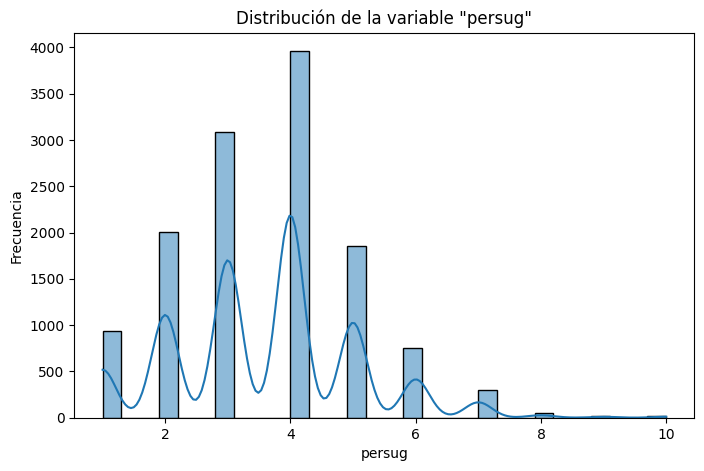

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(censo_df['persug'], bins=30, kde=True)
plt.title('Distribución de la variable "persug"')
plt.xlabel('persug')
plt.ylabel('Frecuencia')
plt.show()


Ver valores únicos en columnas categóricas (para detectar errores)

In [42]:
# Columnas categóricas (tipo texto)
columnas_categoricas = censo_df.select_dtypes(include='object').columns

# Mostrar los primeros 10 valores únicos de cada columna categórica
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(censo_df[col].value_counts(dropna=False).head(10))



Columna: Departamento
Departamento
SANTANDER    12987
Name: count, dtype: int64

Columna: Municipio
Municipio
LOS SANTOS    12987
Name: count, dtype: int64

Columna: fec_paquete
fec_paquete
2023-05-05 17:02:21.163    175
2022-04-07 16:59:58.747    173
2023-04-27 17:15:26.073    110
2023-06-14 17:14:31.410    102
2021-06-04 07:49:31.273    101
2023-07-18 09:52:50.867     92
2021-09-06 09:33:15.053     90
2023-05-19 16:41:00.063     81
2023-07-13 17:01:42.660     80
2021-07-30 17:00:20.323     80
Name: count, dtype: int64

Columna: ver_estructura
ver_estructura
50118082017         5413
40018082017         4478
40118082017         1926
30118082017         1056
18082017              51
30018082017           50
401L18082017           9
5.0.0 - 18082017       4
Name: count, dtype: int64

Columna: NOM_CORREGIMIENTO
NOM_CORREGIMIENTO
SIN CORREGIMIENTO    12127
CORREGIMIENTO_S4       709
SAN MIGUEL              99
MAJADAL                 52
Name: count, dtype: int64

Columna: NOM_VEREDA
NOM_VE

Municipios con mayor cantidad de registros

In [44]:
censo_df['Municipio'].value_counts().head(10)


,count
Municipio,
LOS SANTOS,12987


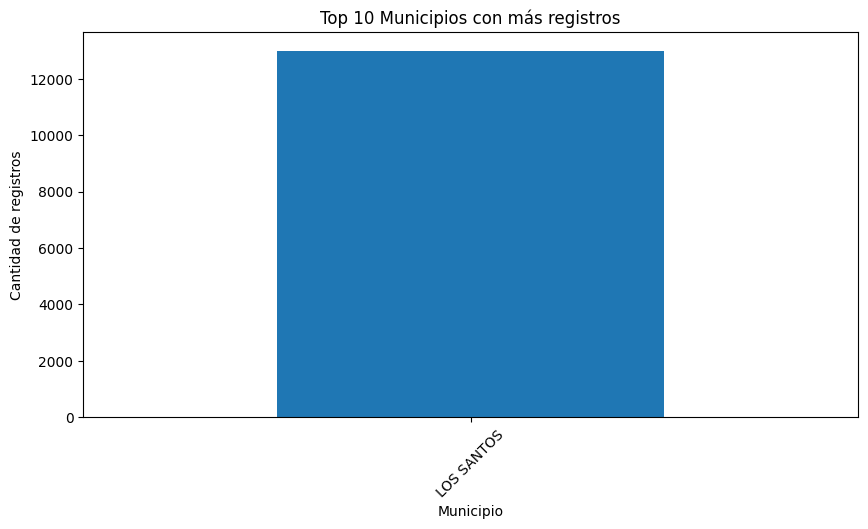

In [45]:
# Visualizar los municipios más comunes
plt.figure(figsize=(10, 5))
censo_df['Municipio'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Municipios con más registros')
plt.ylabel('Cantidad de registros')
plt.xlabel('Municipio')
plt.xticks(rotation=45)
plt.show()


In [46]:
print("Total de filas:", censo_df.shape[0])
print("Total de columnas:", censo_df.shape[1])
print("Nulos restantes por columna:")
print(censo_df.isnull().sum().sort_values(ascending=False).head(10))


Total de filas: 12987
Total de columnas: 249
Nulos restantes por columna:
fec_ini_visita2          6311
fec_ini_persona1         6221
fec_fin_persona1         6220
seg_nom_informante       6176
seg_nombre               4849
fec_fin_visita2          1181
fec_fin_visita1           693
fec_ini_visita1           693
fec_actualizacion_cns     599
seg_ape_informante        394
dtype: int64


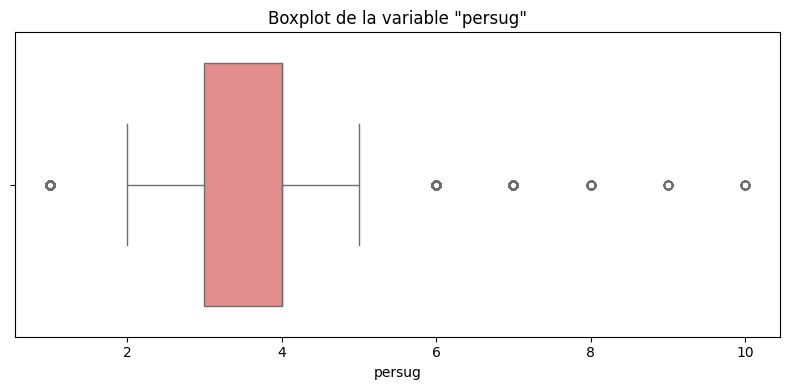

In [47]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=censo_df['persug'], color='lightcoral')
plt.title('Boxplot de la variable "persug"')
plt.tight_layout()
plt.show()


<ipython-input-48-1dc7f09bbbc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=censo_df, x='Clasificacion', order=censo_df['Clasificacion'].value_counts().index, palette="Set2")


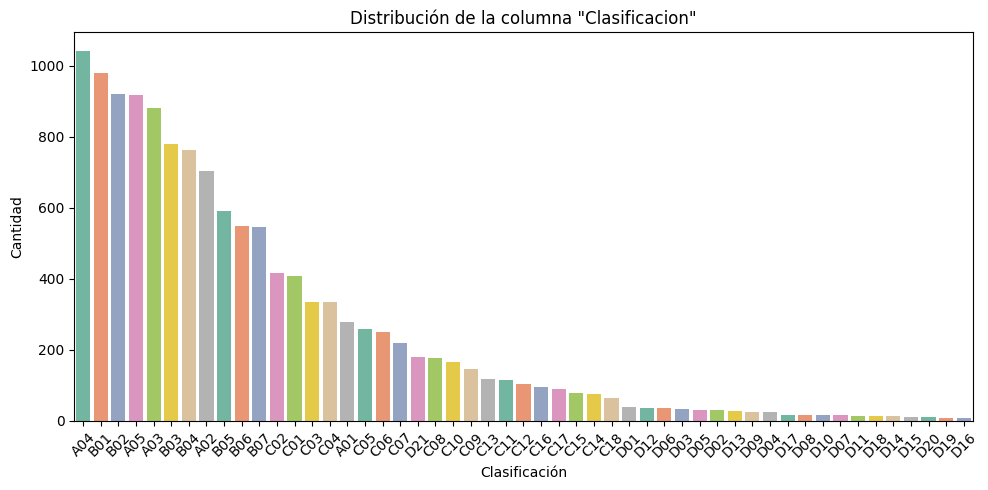

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=censo_df, x='Clasificacion', order=censo_df['Clasificacion'].value_counts().index, palette="Set2")
plt.title('Distribución de la columna "Clasificacion"')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dispersión: persug vs edad (si existe)

In [51]:
if 'Edad' in censo_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=censo_df, x='edad', y='persug', alpha=0.5)
    plt.title('Relación entre Edad y persug')
    plt.xlabel('Edad')
    plt.ylabel('persug')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'edad' no existe en el DataFrame.")


La columna 'edad' no existe en el DataFrame.


In [52]:
# Ver columnas numéricas disponibles
columnas_numericas = censo_df.select_dtypes(include='number').columns
print("Columnas numéricas:", list(columnas_numericas))


Columnas numéricas: ['cod_dpto', 'cod_mpio', 'num_ficha', 'ide_edificacion', 'ori_encuesta', 'Cod_clase', 'Cod_centro_poblado', 'Cod_area_coordinacion', 'Cod_area_operativa', 'Cod_uni_cobertura', 'Cod_comuna', 'Cod_corregimiento', 'Cod_vereda', 'Cod_barrio', 'Cod_enumerador', 'tot_viviendas', 'tot_hogares', 'ord_vivienda', 'ind_direccion', 'uso_vivienda', 'Coord_x_manual_rec', 'Coord_y_manual_rec', 'Coord_x_auto_rec', 'Coord_y_auto_rec', 'Gps_Alt_auto_rec', 'Gps_Distancia_rec', 'Coord_x_manual_enc', 'Coord_y_manual_enc', 'Coord_x_auto_enc', 'Coord_y_auto_enc', 'Gps_Alt_auto_enc', 'Gps_Distancia_enc', 'Est_nov_cartografia', 'Cod_digitador', 'ind_formato', 'Num_hogares_recuento', 'est_ficha', 'Cod_equipo_encuesta', 'Num_visita', 'Num_solicitud', 'Cod_UC_total', 'tip_vivienda', 'tip_mat_paredes', 'tip_mat_pisos', 'ind_tiene_energia', 'tip_estrato_energia', 'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_recoleccion', 'ind_tiene_acueducto', 'tip_estrato_acueducto', 'num_cuartos_viv

total_hogares vs persug:

In [58]:
# Mostrar nombres de columnas numéricas disponibles en tu DataFrame
columnas_numericas = censo_df.select_dtypes(include='number').columns
print("Columnas numéricas disponibles:")
print(columnas_numericas)


Columnas numéricas disponibles:
Index(['cod_dpto', 'cod_mpio', 'num_ficha', 'ide_edificacion', 'ori_encuesta',
       'Cod_clase', 'Cod_centro_poblado', 'Cod_area_coordinacion',
       'Cod_area_operativa', 'Cod_uni_cobertura',
       ...
       'I15', 'Nivel', 'ide_Ug', 'persug', 'Capital', 'marca', 'estado',
       'Linea_p', 'replicacion', 'C'],
      dtype='object', length=212)


Gráfico de dispersión entre dos columnas reales

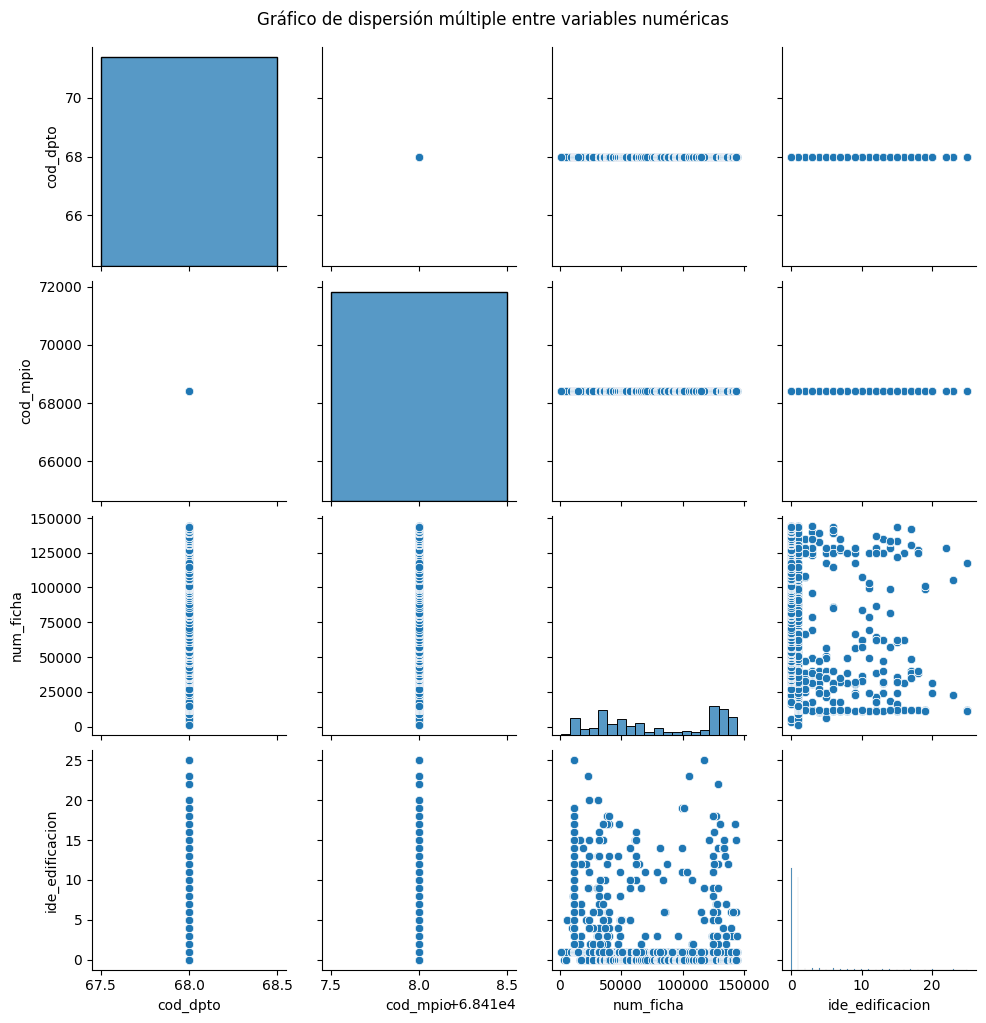

In [60]:
# Usar hasta 4 columnas numéricas si hay muchas
columnas_para_parejas = columnas_numericas[:4]

if len(columnas_para_parejas) >= 2:
    sns.pairplot(censo_df[columnas_para_parejas])
    plt.suptitle('Gráfico de dispersión múltiple entre variables numéricas', y=1.02)
    plt.show()
else:
    print("No hay suficientes columnas numéricas.")

